<a href="https://colab.research.google.com/github/vishalkotwal/Sentiment-analysis-/blob/master/Movie_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_excel("moviereviews.xlsx")

#Movie review dataset

In [4]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6682 entries, 0 to 6681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     6682 non-null   object
 1   sentiment  6682 non-null   object
dtypes: object(2)
memory usage: 104.5+ KB


#MovieReview analysis

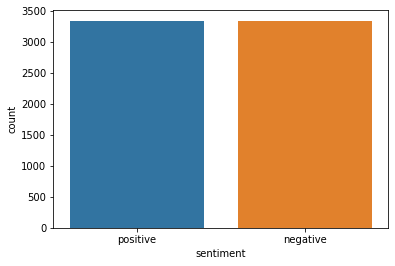

In [6]:
sns.countplot(x = "sentiment",data = df)

# Therefore The data is not biased

In [7]:
df['sentiment'].value_counts()

negative    3342
positive    3340
Name: sentiment, dtype: int64

# Get dumbies for whether the review is positive or negative

In [8]:
df['review'] = df['review'].fillna(' ')
x = df.iloc[:,0].values

#splitting tha dataset

In [9]:
df['binary'] = 1
df.loc[df['sentiment'] =="negative","binary"] =0
df.loc[df['sentiment']=="positive", 'binary'] = 1
y = df.iloc[:,2].values
y

array([1, 1, 1, ..., 1, 0, 0])

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.611111111111111,norm = 'l2')
tfidf_x = tfidf.fit_transform(x)

#Hyperparameter tuning using gridsearchcv

In [11]:
from sklearn.model_selection import  GridSearchCV
from sklearn.naive_bayes import MultinomialNB
parameters = {'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
Model2 = MultinomialNB()
grid = GridSearchCV(Model2,parameters,cv = 10 ,scoring="f1",iid= True)
grid.fit(tfidf_x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid=True, n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [12]:
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

mean_test_score  std_test_score          params
0         0.837082        0.012012  {'alpha': 0.1}
1         0.841274        0.016394  {'alpha': 0.2}
2         0.842183        0.014775  {'alpha': 0.3}
3         0.841542        0.015175  {'alpha': 0.4}
4         0.842308        0.013142  {'alpha': 0.5}
5         0.841138        0.014419  {'alpha': 0.6}
6         0.838400        0.013780  {'alpha': 0.7}
7         0.837310        0.014326  {'alpha': 0.8}
8         0.836855        0.014007  {'alpha': 0.9}
9         0.834962        0.012716  {'alpha': 1.0}

#selecting best score and estimator

In [13]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8423084411551236
{'alpha': 0.5}
MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)


##splittng the dataset into train,test

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [15]:
x_train.shape

(4677,)

# Implementing sentiment analysis


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer


# Applying TFIDF values on TF(train and test)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
Multimodel = Pipeline([('tfidf',TfidfVectorizer(binary = True,max_df=0.611111111111111,norm = 'l2')),("Multinomial",MultinomialNB(alpha = 0.5,class_prior=None, fit_prior=True))])

In [18]:
#model = MultinomialNB(alpha = 0.058,fit_prior=True)
Multimodel.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.611111111111111,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('Multinomial',
                 MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True))],
         verbo

#predicting the values 

In [19]:
y_pred = Multimodel.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 1, 0])

# Evaluating model Accuracy

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score
from sklearn.model_selection import cross_val_score

In [21]:
print(accuracy_score(y_pred,y_test)*100)
print(f1_score(y_test,y_pred))

85.18703241895261
0.8465116279069768


In [22]:
confusion_matrix(y_pred,y_test)

array([[889, 167],
       [130, 819]])

In [23]:
precision_score(y_test,y_pred)

0.863013698630137

In [24]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1056
           1       0.83      0.86      0.85       949

    accuracy                           0.85      2005
   macro avg       0.85      0.85      0.85      2005
weighted avg       0.85      0.85      0.85      2005



In [25]:
y_pred = Multimodel.predict(["Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."])
y_pred

array([0])

#Plotting text as Wordcloud

In [26]:
from wordcloud import WordCloud,STOPWORDS

#i'am using colab and Due to too much of data it says you've crashed

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
for val in df["review"]: 
  val = str(val)  
  tokens = val.split() 
  for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plt the wordcount
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)  
plt.show()